# Keep-it-dry! SVC
Dataset: ki_ro_ros.csv

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearnex import patch_sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA

from pprint import pprint

## Dataset Selection

In [4]:
datasets_dict = {}

datasets_dict['ii_mm_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_adasyn.csv', index_col=0)
datasets_dict['ii_mm_ros'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_ros.csv', index_col=0)
datasets_dict['ii_mm_rus'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_rus.csv', index_col=0)
datasets_dict['ii_mm_smote'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_smote.csv', index_col=0)
datasets_dict['ii_mm_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_smotenc_1.csv', index_col=0)

datasets_dict['ii_ro_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_adasyn.csv', index_col=0)
datasets_dict['ii_ro_ros'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_ros.csv', index_col=0)
datasets_dict['ii_ro_rus'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_rus.csv', index_col=0)
datasets_dict['ii_ro_smote'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_smote.csv', index_col=0)
datasets_dict['ii_ro_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_smotenc_1.csv', index_col=0)

datasets_dict['ii_st_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_adasyn.csv', index_col=0)
datasets_dict['ii_st_ros'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_ros.csv', index_col=0)
datasets_dict['ii_st_rus'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_rus.csv', index_col=0)
datasets_dict['ii_st_smote'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_smote.csv', index_col=0)
datasets_dict['ii_st_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_smotenc_1.csv', index_col=0)

datasets_dict['ki_mm_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_adasyn.csv', index_col=0)
datasets_dict['ki_mm_ros'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_ros.csv', index_col=0)
datasets_dict['ki_mm_rus'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_rus.csv', index_col=0)
datasets_dict['ki_mm_smote'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_smote.csv', index_col=0)
datasets_dict['ki_mm_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_smotenc_1.csv', index_col=0)

datasets_dict['ki_ro_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_adasyn.csv', index_col=0)
datasets_dict['ki_ro_ros'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_ros.csv', index_col=0)
datasets_dict['ki_ro_rus'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_rus.csv', index_col=0)
datasets_dict['ki_ro_smote'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_smote.csv', index_col=0)
datasets_dict['ki_ro_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_smotenc_1.csv', index_col=0)

datasets_dict['ki_st_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_adasyn.csv', index_col=0)
datasets_dict['ki_st_ros'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_ros.csv', index_col=0)
datasets_dict['ki_st_rus'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_rus.csv', index_col=0)
datasets_dict['ki_st_smote'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_smote.csv', index_col=0)
datasets_dict['ki_st_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_smotenc_1.csv', index_col=0)

c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear fail

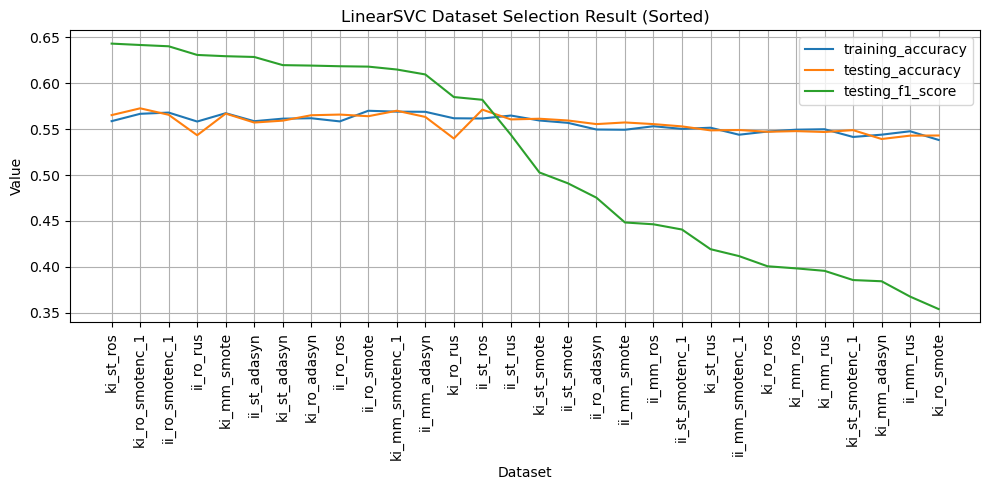

In [5]:
dataset_result = {}
dataset_result['dataset'] = []
dataset_result['training_accuracy'] = []
dataset_result['testing_accuracy'] = []
dataset_result['testing_f1_score'] = []

for title, data in datasets_dict.items():

    X_df = data.copy()
    y_df = X_df.pop('failure')
    object_cols = X_df.select_dtypes(include=['object']).columns
    X_df = X_df.drop(object_cols, axis=1)

    X_train, X_val, y_train, y_val = train_test_split(X_df, y_df, test_size=.2, stratify=y_df, random_state=42)
    
    linearsvc_dataset = LinearSVC()
    linearsvc_dataset.fit(X_train, y_train)
    
    y_predict = linearsvc_dataset.predict(X_val)

    dataset_result['dataset'].append(title)
    dataset_result['training_accuracy'].append(linearsvc_dataset.score(X_train, y_train))
    dataset_result['testing_accuracy'].append(linearsvc_dataset.score(X_val, y_val))
    dataset_result['testing_f1_score'].append(f1_score(y_val, y_predict))

df_result = pd.DataFrame(dataset_result)
df_result_sorted = df_result.sort_values(by='testing_f1_score', ascending=False)

plt.figure(figsize=[10, 5])

sns.lineplot(data=df_result_sorted, x='dataset', y='training_accuracy', label='training_accuracy').grid(True)
sns.lineplot(data=df_result_sorted, x='dataset', y='testing_accuracy', label='testing_accuracy')
sns.lineplot(data=df_result_sorted, x='dataset', y='testing_f1_score', label='testing_f1_score')

plt.title("LinearSVC Dataset Selection Result (Sorted)")
plt.ylabel("Value")
plt.xlabel("Dataset")
plt.xticks(rotation=90)

plt.tight_layout()
plt.legend()
plt.show()

## Data Read

In [2]:
df_train = pd.read_csv('./../Preprocessing/kid_train_ki_ro_ros.csv', index_col=0)
df_test = pd.read_csv('./../Preprocessing/kid_test_ki_ro.csv', index_col=0)

In [3]:
df_train.head()

,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,-0.866789,7.0,8.0,9,5,0.000000,0.000000,-0.50,0.191386,0.587838,...,-0.582308,-0.155224,-0.823018,1.817328,-0.416608,-0.826421,-0.996926,-0.798281,0.405153,0.0
1,-0.768774,7.0,8.0,9,5,1.166667,-0.833333,-0.75,0.320974,-0.146396,...,0.783846,1.031983,-0.658824,0.022965,-0.627395,-0.310259,-0.299693,-0.369968,-0.127292,0.0
2,-0.819112,7.0,8.0,9,5,0.833333,-1.166667,-0.25,0.204120,-0.062312,...,0.989231,-0.298507,-0.298414,1.089248,0.777147,1.355888,-0.453893,0.677069,-0.248529,0.0
3,-0.437692,7.0,8.0,9,5,1.000000,-1.000000,0.00,-0.366667,-0.410661,...,0.801538,0.121677,-0.422506,-0.882568,-0.259759,-0.239060,0.601434,0.327001,0.808704,0.0
4,1.342337,7.0,8.0,9,5,0.333333,-1.000000,0.50,1.169663,0.912162,...,-0.840000,0.540156,0.372890,0.374217,0.401703,-1.695250,-0.935963,-0.016735,-0.790371,0.0


In [4]:
df_test_id = df_test[['id']]
df_test.drop(columns=['id', 'product_code', 'product_code_F', 'product_code_G', 'product_code_H', 'product_code_I'], inplace=True)
df_test.head()

,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,-0.059136,5.0,6.0,6,4,-0.166667,0.166667,0.0,1.138951,-1.168919,...,-0.274792,-0.482308,-0.126795,-0.579540,1.075678,-1.388928,0.417316,-0.634221,0.570330,-0.435202
1,-0.183139,5.0,6.0,6,4,0.666667,0.000000,-1.5,0.073783,0.144144,...,0.265708,0.463846,-1.213362,-0.441432,0.397704,1.314407,0.356512,-0.104508,-1.061511,-1.068447
2,-0.210763,5.0,6.0,6,4,0.166667,0.666667,-0.5,0.517228,-0.941441,...,-0.940954,0.241538,0.519687,-0.571355,-0.419624,-1.599006,-0.148114,1.068135,-0.193578,-0.276961
3,-0.199304,5.0,6.0,6,4,0.166667,0.500000,1.0,-0.948689,-0.635886,...,-0.052233,0.277692,1.155935,-1.554987,-0.406054,-0.081618,-0.184492,-1.209016,-0.152872,-0.696814
4,1.750358,5.0,6.0,6,4,1.166667,1.333333,0.5,0.017603,0.719219,...,0.093868,0.723846,-0.883582,-0.692583,0.120042,0.322214,0.083671,-0.848361,0.317051,0.644913


In [5]:
# Scale
# Scaled already

In [6]:
X_df = df_train[df_train.columns[:-1]]
y_df = df_train[df_train.columns[-1]]

## PCA

In [8]:
n_components_range = range(15, 18)  # Explore components from 10 to 22

best_n_components = None
best_score = -np.inf  # Initialize with a negative infinity

for n_components in n_components_range:
  # Apply PCA with current n_components
  pca = PCA(n_components=n_components)
  pca_data = pca.fit_transform(X_df)

  # Train linearsvc on transformed data
  model = SVC()
  model.fit(pca_data, y_df)

  # Evaluate performance on testing set (e.g., using F1 score)
  score = model.score(pca.transform(X_df), y_df)
  print(f"{n_components} components score: {score}")

  # Update best component and score if performance improves
  if score > best_score:
    best_n_components = n_components
    best_score = score

print("Best number of components based on LinearSVC performance:", best_n_components)

15 components score: 0.6476984847760623
16 components score: 0.660532479326992
17 components score: 0.6711677262081163
Best number of components based on LinearSVC performance: 17


In [9]:
n_components_range = range(18, 21)  # Explore components from 10 to 22

best_n_components = None
best_score = -np.inf  # Initialize with a negative infinity

for n_components in n_components_range:
  # Apply PCA with current n_components
  pca = PCA(n_components=n_components)
  pca_data = pca.fit_transform(X_df)

  # Train linearsvc on transformed data
  model = SVC()
  model.fit(pca_data, y_df)

  # Evaluate performance on testing set (e.g., using F1 score)
  score = model.score(pca.transform(X_df), y_df)
  print(f"{n_components} components score: {score}")

  # Update best component and score if performance improves
  if score > best_score:
    best_n_components = n_components
    best_score = score

print("Best number of components based on SVC performance:", best_n_components)

18 components score: 0.6780746618230487
19 components score: 0.688853305291334
20 components score: 0.6956407437502987
Best number of components based on SVC performance: 20


In [10]:
pca = PCA(n_components=20)
X_df_pca = pca.fit_transform(X_df)
df_test_pca = pca.transform(df_test)

## Hyperparameter Tuning using GridSearchCV

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_df_pca, y_df, test_size=.2, random_state=42, stratify=y_df)

In [17]:
# Define model
model = SVC(kernel='rbf') 

# Define hyperparameter grid
param_grid = {
    'C': np.logspace(-2, 2, 10),  # Search for different regularization strengths
    'gamma': np.logspace(-3, 1, 5),  # Search for gamma values if using 'rbf' kernel
}

# Define GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1')  # Use F1 score for imbalanced data

In [18]:
# GridSearchCV fitting
grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [19]:
svc_best = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best f1-score: {grid_search.best_score_}")

Best parameters: {'C': 4.641588833612777, 'loss': 'squared_hinge', 'penalty': 'l2'}
Best f1-score: 0.5372615487167931


## Prediction

In [21]:
y_pred = svc_best.predict(df_test_pca)
y_pred_df = pd.DataFrame(y_pred, columns=['failure'])

In [22]:
y_submission = pd.concat([df_test_id, y_pred_df], axis=1)

In [23]:
y_submission.head()

,id,failure
0,26570,0.0
1,26571,0.0
2,26572,0.0
3,26573,0.0
4,26574,1.0


In [24]:
y_submission.to_csv('./../Submission/kid_submission_linearsvc.csv', index=False)